## 코로나 19 일일 확진자 수 데이터를 활용한 데이터 분석 및 시각화

/var/folders/wl/4dzl2hr9343dcnf6q0n7khhw0000gn/T/ipykernel_36015/84233220.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['일일 확진자수'] = one


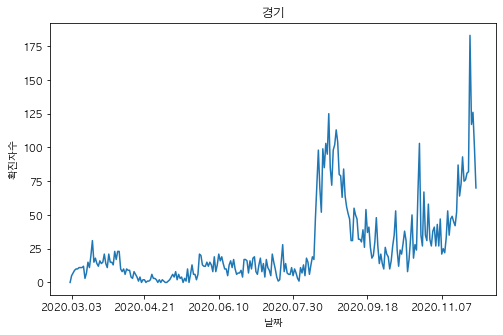

In [108]:
# 입력 받은 해당 지역 일일 확진자 수 시각화 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('covid.csv', encoding = 'cp949')

# 데이터 입력 받기
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 입력받은 데이터와 맞는 지역 찾아 region에 저장
region = df[df['지역'] == name]

# 일일 확진자수 구하기
one = []

for i in range(len(region)):
    if i == 0:
        one_day = 0
    else:
        one_day = region.iloc[i, 2] - region.iloc[i - 1, 2]
        if(one_day < 0):  # 음수 예외처리 
            one_day = 0

    one.append(one_day)

# DataFrame에 일일 확진자수 추가
region['일일 확진자수'] = one

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 일일 확진자 수 시각화
plt.figure(figsize=(8,5))
plt.title(name)
plt.plot(region.iloc[:,0], region.iloc[:,3])
plt.xlabel(region.columns[0])
plt.ylabel(region.columns[2])
plt.xticks([1,50,100,150,200,250])
plt.show()

/var/folders/wl/4dzl2hr9343dcnf6q0n7khhw0000gn/T/ipykernel_36015/369912762.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['증감률'] = variation


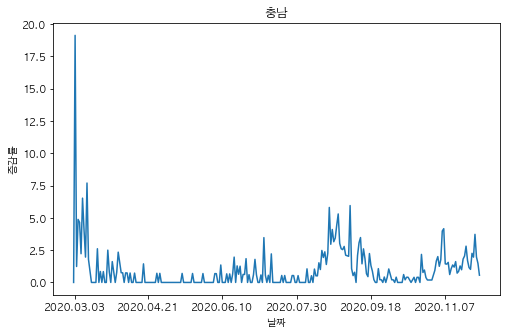

In [109]:
# 입력 받은 해당 지역 일일 증감률 시각화 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('covid.csv', encoding = 'cp949')

# 데이터 입력 받기
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 입력받은 데이터와 맞는 지역 찾아 region에 저장
region = df[df['지역'] == name]

# 일일 증감률 구하기
variation = []

for i in range(len(region)):
    if i == 0:
        variation_day = 0
    else:
        variation_day = ((region.iloc[i, 2] - region.iloc[i - 1,2]) / region.iloc[i - 1, 2]) * 100
        if(variation_day < 0):  # 음수 예외처리 
            variation_day = 0
    
    variation.append(variation_day)

# DataFrame에 일일 증감률 추가
region['증감률'] = variation

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 일일 증감률 시각화
plt.figure(figsize=(8,5))
plt.title(name)
plt.plot(region.iloc[:,0], region.iloc[:,3])
plt.xlabel(region.columns[0])
plt.ylabel(region.columns[3])
plt.xticks([1,50,100,150,200,250])
plt.show()

/var/folders/wl/4dzl2hr9343dcnf6q0n7khhw0000gn/T/ipykernel_36015/2211983399.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['일일 평균 확진자수'] = onemean
/var/folders/wl/4dzl2hr9343dcnf6q0n7khhw0000gn/T/ipykernel_36015/2211983399.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['일일 확진자수'] = one
/var/folders/wl/4dzl2hr9343dcnf6q0n7khhw0000gn/T/ipykernel_36015/2211983399.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

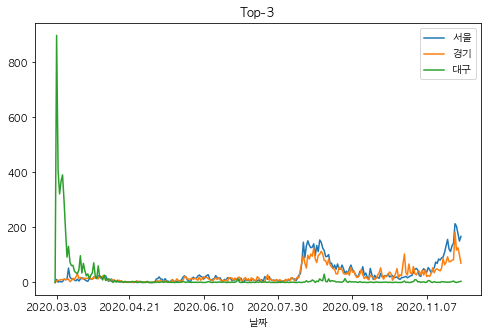

In [113]:
# 지역 일일 평균 확진자 수가 많은 Top-3 시각화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('covid.csv', encoding = 'cp949')

# 마지막 날짜에 지역의 unique한 개수만큼만 추출 해 보기
## 이유는 마지막 날짜가 누적 확진자를 다 포함한 값이기 때문에 (마지막 날짜 / 날짜 일 수)만큼 해주면 평균 확진자 수를 알 수 있음
df_top = df.iloc[-(df['지역'].nunique()):,:]

# 일일 평균 확진자 수 구하기
one_mean = []

for i in range(df['지역'].nunique()):
    one_day_mean = df_top.iloc[i,2] / df['날짜'].nunique()
    one_mean.append(one_day_mean)

# DataFrame에 일일 평균 확진자수 추가
df_top['일일 평균 확진자수'] = one_mean

# 일일 평균 확진자수를 내림차순으로 정렬
df_top = df_top.sort_values(by=['일일 평균 확진자수'], axis = 0, ascending = False)

# Top 3 list에 저장 
top3 = df_top.iloc[:3,1].tolist()

# Top 3 지역의 일일 확진자수 구하기
for i in range(3):
    
    one = []
    rank = top3[i]
    region = df[df['지역'] == rank]

    for j in range(len(region)):
        if j == 0:
            one_day = 0
        else:
            one_day = region.iloc[j, 2] - region.iloc[j - 1, 2]
            
        one.append(one_day)

    # DataFrame에 일일 확진자수 추가
    region['일일 확진자수'] = one
    
    if i == 0:  # 일일 평균 확진자수 Top 1
        region_one = region
    elif i == 1:    # 일일 평균 확진자수 Top 2
        region_two = region
    else:   # 일일 평균 확진자수 Top 3
        region_three = region

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 일일 증감률 시각화
plt.figure(figsize=(8,5))
plt.title('Top-3')
plt.plot(region_one.iloc[:,0], region_one.iloc[:,3])
plt.plot(region_two.iloc[:,0], region_two.iloc[:,3])
plt.plot(region_three.iloc[:,0], region_three.iloc[:,3])
plt.xlabel(region.columns[0])
plt.legend([top3[0], top3[1], top3[2]], loc = "upper right")
plt.xticks([1,50,100,150,200,250])
plt.show()